In [1]:
# Instalar paquete anastruct
!pip install git+https://github.com/EnriqueGarMac/Estructuras_I_II.git

  Cloning https://github.com/EnriqueGarMac/Estructuras_I_II.git to /tmp/pip-req-build-j_3g_qml
  Running command git clone --filter=blob:none --quiet https://github.com/EnriqueGarMac/Estructuras_I_II.git /tmp/pip-req-build-j_3g_qml
  Resolved https://github.com/EnriqueGarMac/Estructuras_I_II.git to commit c9e8ec5ccf95280ab4b076ee980481f71420b2ac
  Preparing metadata (setup.py) ... done
  Created wheel for anastruct: filename=anastruct-0.0.0-py3-none-any.whl size=67693 sha256=bad5d416a657ae5067640fb9bedb590df651ed6ce4de5d6b4092cbc126922195
  Stored in directory: /tmp/pip-ephem-wheel-cache-td78vj23/wheels/3b/3f/0d/b0639b1b66d8022c51fa6b7d7eca03529fcfcb912fc5161a7c
Successfully built anastruct


In [4]:

import numpy as np
from anastruct import SystemElements
import collections
collections.Iterable = collections.abc.Iterable

# Crear objeto para la estructura
ss = SystemElements()

h = 4.0 # Ancho celda
hv = 4.5 # Alto montantes

Ar = 10 # Area [cm2]
Ey = 2.10e+4 # Módulo de Young [kN/cm2]

F1 = -50.0E+3 # Carga F1
F2 = -100.0E+3 # Carga F2
F3 = -150.0E+3 # Carga F3
F4 = -200.0E+3 # Carga F4

# Añadimos barras
ss.add_truss_element(location=[[0,0], [0,4]],EA=Ey*Ar)
ss.add_truss_element(location=[[0,4], [0,8]],EA=Ey*Ar)
ss.add_truss_element(location=[[5,0], [5,4]],EA=Ey*Ar)
ss.add_truss_element(location=[[0,8], [5,4]],EA=Ey*Ar)
ss.add_truss_element(location=[[0,4], [5,4]],EA=Ey*Ar)
ss.add_truss_element(location=[[0,0], [5,4]],EA=Ey*Ar)


# Añadimos rótula al nodo 1
ss.add_support_hinged(node_id=1)
# Añadimos carrito al nodo 4
ss.add_support_hinged(node_id=4)

# Añadimos carga puntual al nodo 2
ss.point_load(3, Fx= 6,Fy=-10)
ss.point_load(2, Fx = 12)
ss.point_load(1, Fx = 6)
ss.point_load(5, Fx = -10, Fy = -10)





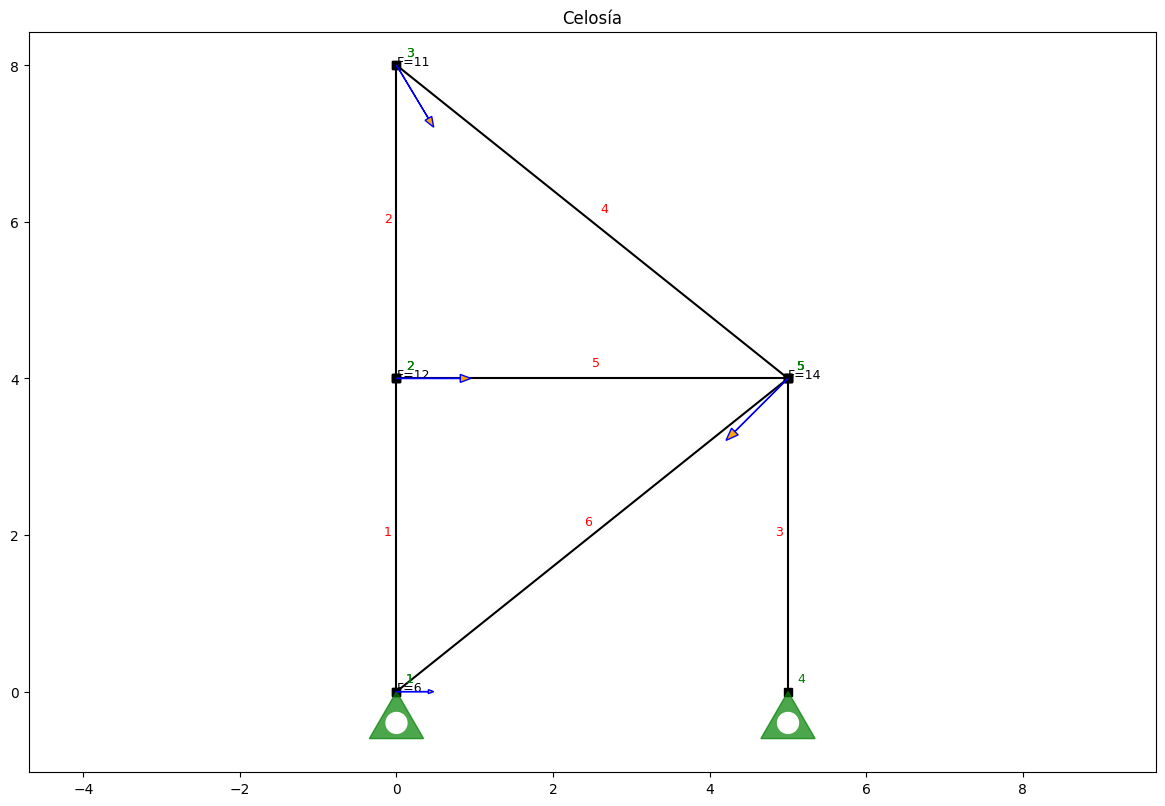

In [5]:
# Mostramos estructura generada
ss.show_structure(title='Celosía')

In [6]:
# Resolvemos la estructura
ss.solve();


 
 
Nudo -> Despl. x  Despl. y
**************************************************
1  ->  -0.0   0.0
2  ->  0.0010088047201974046   -9.904761904761891e-05
3  ->  0.0011876939746311725   -0.000198095238095238
4  ->  -0.0   0.0
5  ->  0.0007230904344831189   -0.0004038095238095236


Reacciones
***************************
*Nodo:  1
Reacción Fx:  -14.0
*Nodo:  1
Reacción Fy:  -1.2
*Nodo:  4
Reacción Fy:  21.2


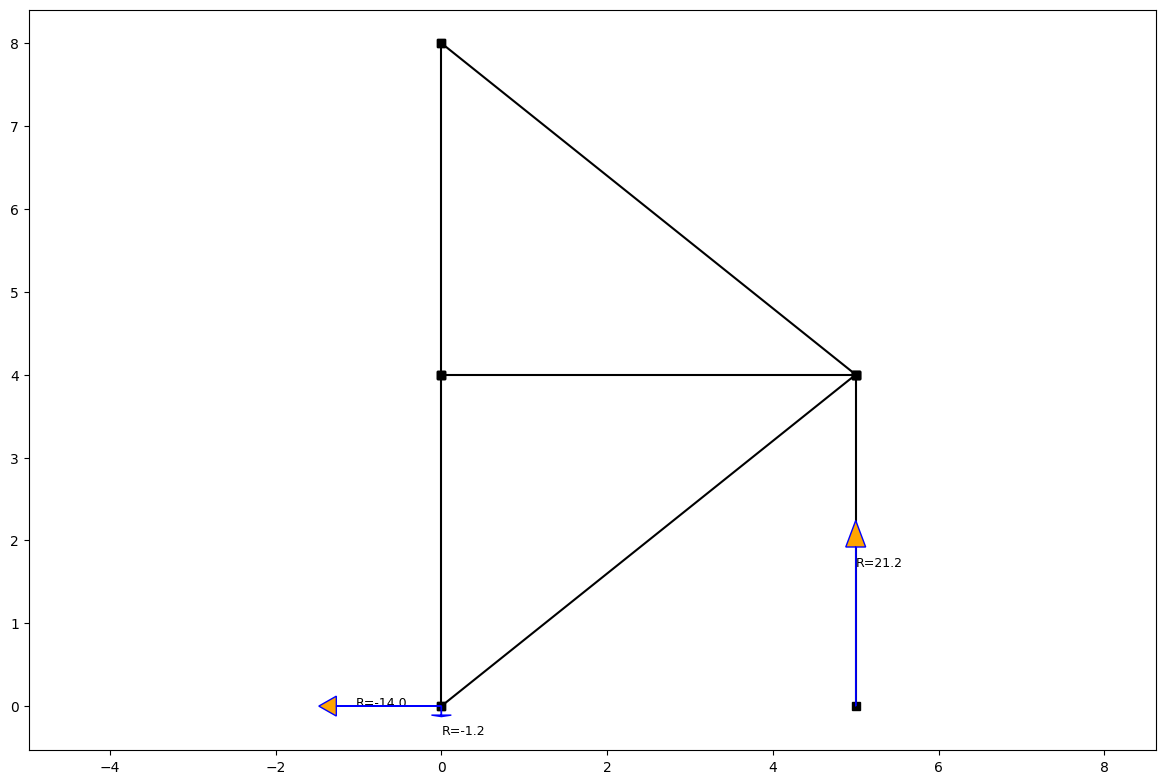

-------------------------------------------


In [7]:
# Mostramos las reacciones
ss.show_reaction_force()

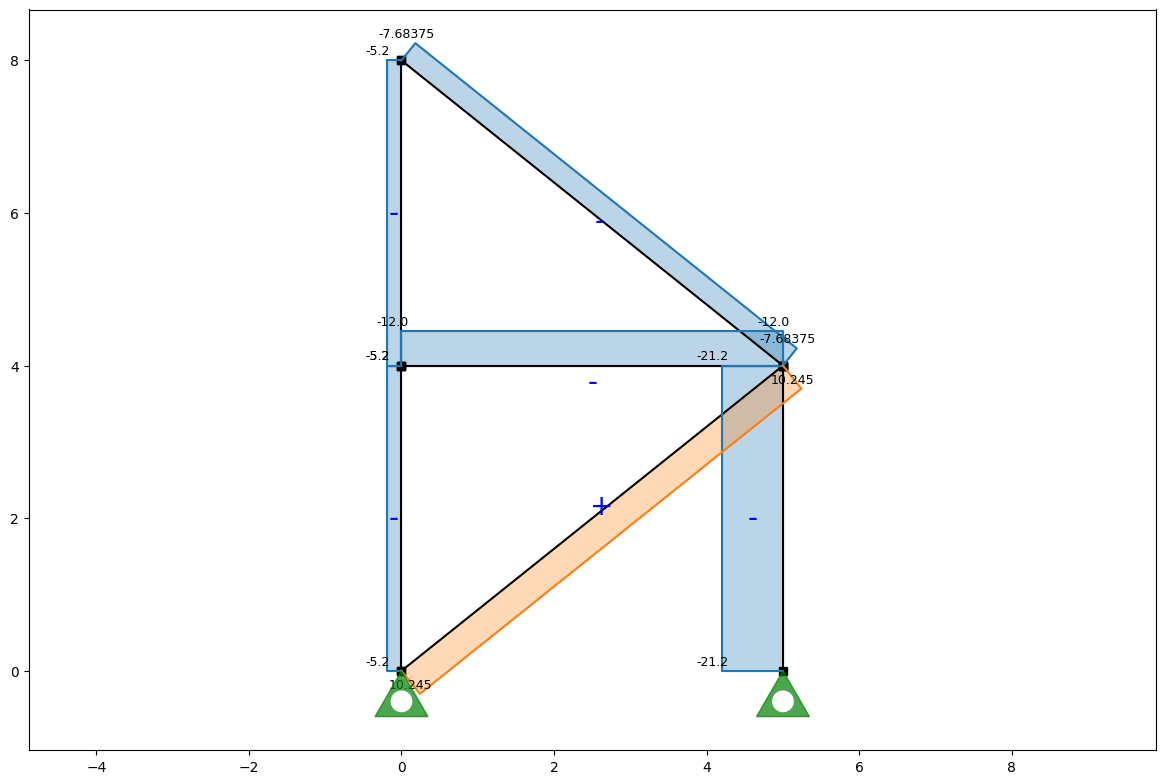

In [8]:
# Mostramos axiles
ss.show_axial_force()



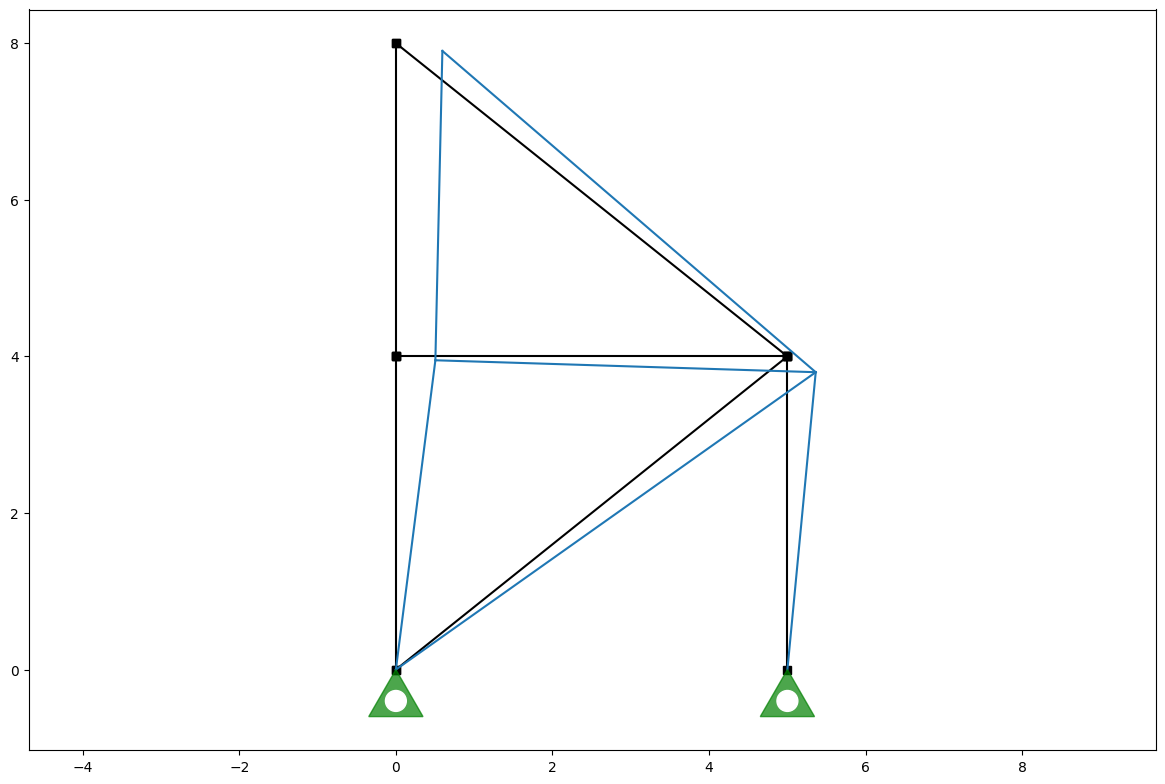

In [9]:
# Mostramos deformada
ss.show_displacement(factor = 500)